In [10]:
import pandas as pd
from google.cloud import bigquery

import matplotlib.pyplot as plt

client = bigquery.Client()

In [11]:
providencia_geral_idade = """
select
 pk_indicador
,indicador
,variavel_abertura_1
,case when categoria_abertura_1 like '%59%' then 'ate 59 anos' else 'mais 60 anos' end as categoria_abertura_1
,variavel_abertura_2
,categoria_abertura_2
,cast(replace(maio,' ','') as int) as maio
,cast(replace(junho,' ','') as int) as junho
,cast(replace(julho,' ','') as int) as julho
 from `pnad_covid.tb_pais`
where
tipo_dado = 'quantidade' and
maio is not null and junho is not null and julho is not null
and pk_indicador = 121
and variavel_abertura_1 = 'Grupos de Idade 2'
and variavel_abertura_2 = 'Providência Tomada'
and categoria_abertura_2 is not null
order by variavel_abertura_1,indicador
"""

df_providencia_geral_idade= client.query(providencia_geral_idade).to_dataframe()

##DF 60 anos mais

In [12]:
df_60 = df_providencia_geral_idade[df_providencia_geral_idade['categoria_abertura_1'].isin(['mais 60 anos'])]

In [13]:
df_60['Total'] = df_60['maio'] + df_60['junho'] +df_60['julho']

<ipython-input-13-e24ac91c565a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_60['Total'] = df_60['maio'] + df_60['junho'] +df_60['julho']


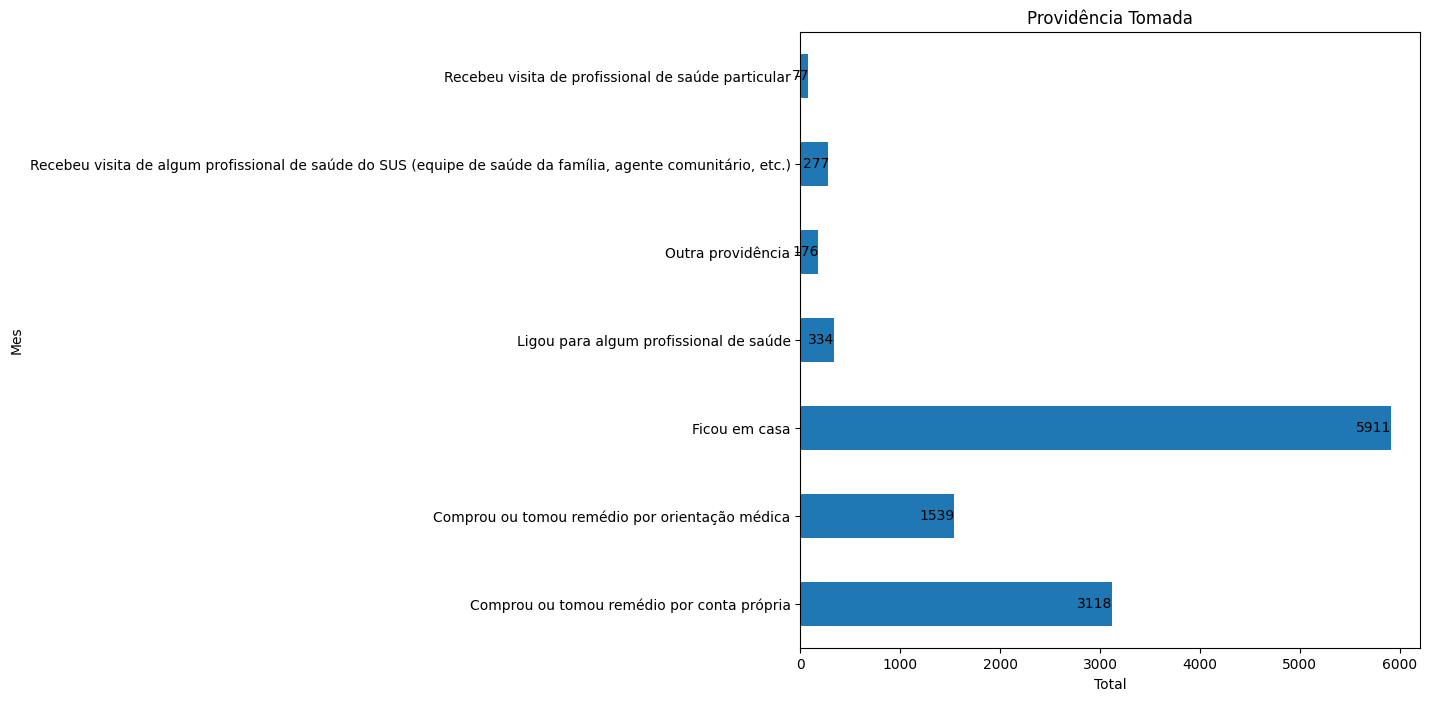

In [14]:
pvt = df_60.pivot_table(values = 'Total', index = 'categoria_abertura_2')


ax = pvt.plot(kind = 'barh',figsize=(8,8),legend=False)
plt.title('Providência Tomada')
plt.xlabel('Total')
plt.ylabel('Mes')

for i in ax.patches:
    ax.text(i.get_width() + 10, i.get_y() + i.get_height() / 2, str(int(i.get_width())),
            ha='right', va='center')

In [15]:
df_60.set_index('categoria_abertura_2', inplace=True)

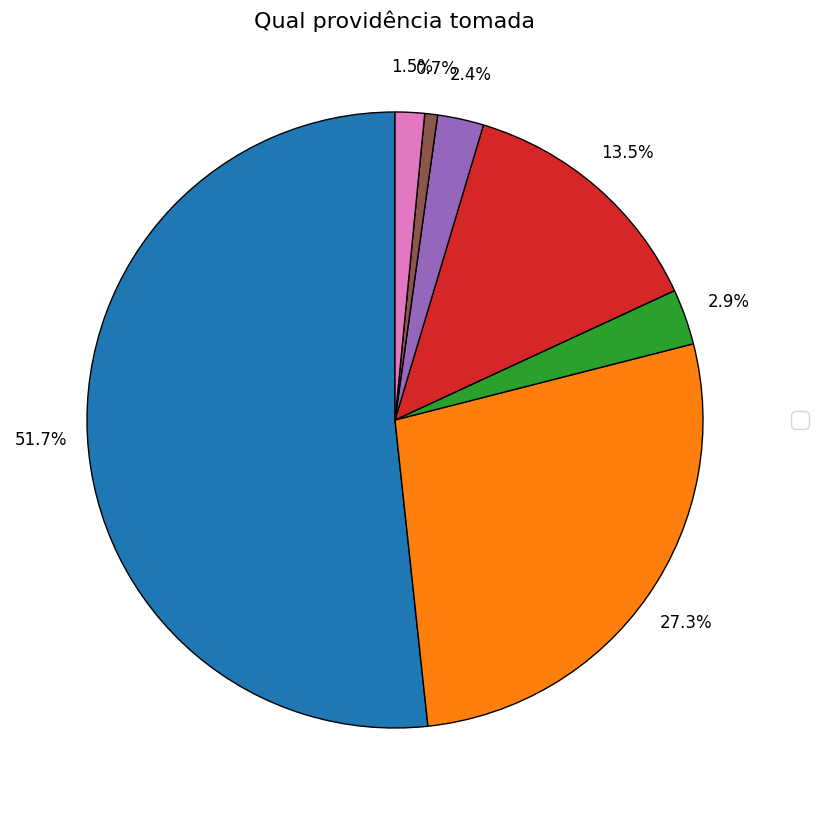

In [20]:

graf = df_60.plot.pie(y='Total',x='categoria_abertura_2',figsize=(10,10), labels = None,autopct='%1.1f%%',startangle=90,pctdistance=1.15, wedgeprops={'edgecolor': 'black'},textprops={'color': 'black', 'fontsize': 12})
plt.title('Qual providência tomada',fontsize=16)
plt.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=16)

plt.show()